# Comparison of $\bar{\nu_{e}}$ scattering on $^{12}$C in different generators 
Comparison is with:
- GENIE
- NuWro
- NEUT
- Achilles
- GiBUU

Settings for the nucleus interaction:
- RPA: off
- Coulomb correction: off
- Pauli Blocking: on 

In [5]:
%%bash
pip install Uproot
pip install SciencePlots
pip install latex

In [1]:
import uproot as up
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
print(plt.style.available)
plt.style.use(["science", "notebook", "grid"])
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"]})

['Solarize_Light2', '_classic_test_patch', 'bmh', 'bright', 'cjk-jp-font', 'cjk-kr-font', 'cjk-sc-font', 'cjk-tc-font', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'grid', 'high-contrast', 'high-vis', 'ieee', 'latex-sans', 'light', 'muted', 'nature', 'no-latex', 'notebook', 'pgf', 'retro', 'russian-font', 'sans', 'scatter', 'science', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'std-colors', 'tableau-colorblind10', 'turkish-font', 'vibrant']


In [2]:
def plot_flattree_diff_xsec(filename: str, kinematic: str, bin_width: float, label: str, color: str):
    infile = up.open(filename)
    TBranch_kinematic = infile["FlatTree_VARS;1"][kinematic].array()
    XSec_scale_factor = max(infile["FlatTree_VARS;1"]["fScaleFactor"].array())

    plt.hist(TBranch_kinematic, bins=np.arange(min(TBranch_kinematic), max(TBranch_kinematic)+0.01, step=bin_width), histtype='step', weights=XSec_scale_factor*np.ones_like(TBranch_kinematic)/(0.01), color=color,linewidth=1, label = label)
    plt.legend(loc = "upper right")
    return 

def format_axis(x_title: str, xunits: str, y_title: str, yunits: str, title: str):
    # plt.xlabel(r"$Q^{2}$ [GeV]")
    plt.xlabel(f"{x_title} [" + xunits + "]")
    plt.ylabel(f"{y_title} [" + yunits + "]")
    plt.title(f"{title}")

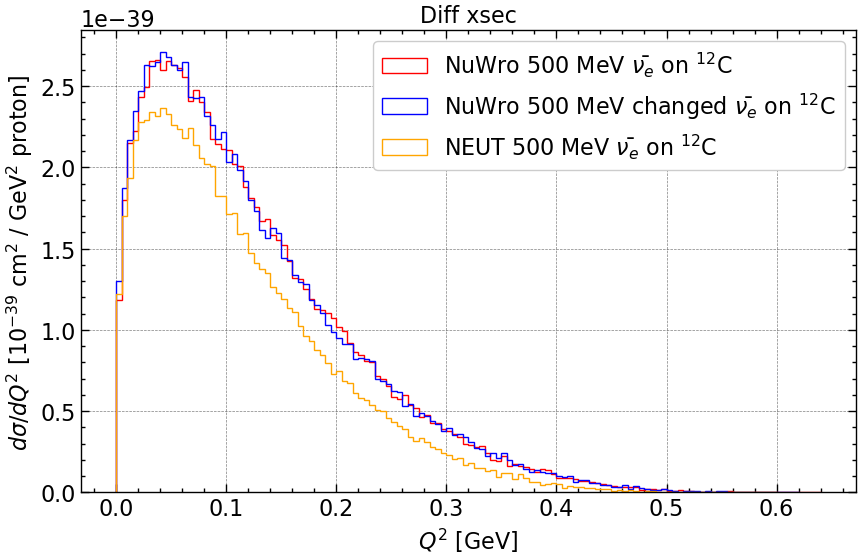

In [4]:
plt.figure(figsize=(10, 6))
width = 0.005
plot_flattree_diff_xsec(filename = "NuWro/NuWro:C_dipole_noFSI_noRPA_-12_500_CCQE.root.GenericVectors.root", kinematic = "Q2", bin_width = width, label = r"NuWro 500 MeV $\bar{\nu_{e}}$ on $^{12}$C", color = 'red')
plot_flattree_diff_xsec(filename = "NuWro/no_kaskada/NuWro:C_dipole_noFSI_noRPA_kaskada_-12_500_CCQE.root.GenericVectors.root", kinematic = "Q2", bin_width = width, label = r"NuWro 500 MeV changed $\bar{\nu_{e}}$ on $^{12}$C", color = 'blue')
plot_flattree_diff_xsec(filename = "NEUT/coulomb_off/nieves_1.05_dipole_nueb_C_0.5GeV.nuisflat.root", kinematic = "Q2", bin_width = width, label = r"NEUT 500 MeV $\bar{\nu_{e}}$ on $^{12}$C", color = 'orange')

format_axis(r"$Q^{2}$", "GeV", r"$d\sigma/dQ^{2}$", r"$10^{-39}$ cm$^{2}$ / GeV$^{2}$ proton", "Diff xsec")


# Below is the original code that is a mess
----
----

In [ ]:
Nuwro_500mev = "NuWro/NuWro:C_dipole_noFSI_noRPA_-12_500_CCQE.root.GenericVectors.root" 
Nuwro_1000mev = "NuWro/NuWro:C_dipole_noFSI_noRPA_-12_1000_CCQE.root.GenericVectors.root" 
Nuwro_2000mev = "NuWro/NuWro:C_dipole_noFSI_noRPA_-12_2000_CCQE.root.GenericVectors.root" 

Nuwro_500mev_changedbe = "NuWro/no_kaskada/NuWro:C_dipole_noFSI_noRPA_kaskada_-12_500_CCQE.root.GenericVectors.root" 
Nuwro_1000mev_changedbe = "NuWro/no_kaskada/NuWro:C_dipole_noFSI_noRPA_kaskada_-12_1000_CCQE.root.GenericVectors.root" 
Nuwro_2000mev_changedbe = "NuWro/no_kaskada/NuWro:C_dipole_noFSI_noRPA_kaskada_-12_2000_CCQE.root.GenericVectors.root" 

NEUT_coulomb_on_500mev = "NEUT/coulomb_on/nieves_1.05_dipole_nueb_C_0.5GeV.nuisflat.root"
NEUT_coulomb_on_1000mev = "NEUT/coulomb_on/nieves_1.05_dipole_nueb_C_1GeV.nuisflat.root"
NEUT_coulomb_on_2000mev = "NEUT/coulomb_on/nieves_1.05_dipole_nueb_C_2GeV.nuisflat.root"

NEUT_coulomb_off_500mev = "NEUT/coulomb_off/nieves_1.05_dipole_nueb_C_0.5GeV.nuisflat.root"
NEUT_coulomb_off_1000mev = "NEUT/coulomb_off/nieves_1.05_dipole_nueb_C_1GeV.nuisflat.root"
NEUT_coulomb_off_2000mev = "NEUT/coulomb_off/nieves_1.05_dipole_nueb_C_2GeV.nuisflat.root"

# NEUT_500mev = "nieves_1.05_dipole_nueb_CH2_2GeV.nuisflat.root" 
# GENIE_500mev = "nueb_on_1000010010_500MeV_0.flat.root" 
# GENIE_500mev = "nueb_on_1000010010_2000MeV_0_normcheck.flat.root"
# GENIE_500mev_old = "CCQE_nuebar_G18_10a_02_11a_0p5GeV.ghep.flat.root"
# Achilles_500mev = "Achilles_nuebar_500.hepmc.GenericVectors.root" 
# Achilles_500mev = "achilles_fixed_Gen_nuebar_500.flat.root" 
# GiBUU_500mev = "GiBUU_500mev_nuebar_fixedW.flat.root" 
# GiBUU_500mev = "EventOutput-ep-fixedW.Pert.nuis.flat.root" 

infile_nuwro = up.open(Nuwro_500mev)
infile_nuwro_1000 = up.open(Nuwro_1000mev)
infile_nuwro_2000 = up.open(Nuwro_2000mev)

infile_nuwro_changedbe = up.open(Nuwro_500mev_changedbe)
infile_nuwro_1000_changedbe = up.open(Nuwro_1000mev_changedbe)
infile_nuwro_2000_changedbe = up.open(Nuwro_2000mev_changedbe)

infile_neut_coulomb_on500 = up.open(NEUT_coulomb_on_500mev)
infile_neut_coulomb_on1000 = up.open(NEUT_coulomb_on_1000mev)
infile_neut_coulomb_on2000 = up.open(NEUT_coulomb_on_2000mev)

infile_neut_coulomb_off500 = up.open(NEUT_coulomb_off_500mev)
infile_neut_coulomb_off1000 = up.open(NEUT_coulomb_off_1000mev)
infile_neut_coulomb_off2000 = up.open(NEUT_coulomb_off_2000mev)
# infile_neut = up.open(NEUT_500mev)
# infile_genie = up.open(GENIE_500mev)
# infile_genie_old = up.open(GENIE_500mev_old)
# infile_achilles = up.open(Achilles_500mev)
# infile_gibuu = up.open(GiBUU_500mev)
# keys = infile.keys()
# FlatTree1 = infile_nuwro["FlatTree_VARS;1"]
# FlatTree2 = infile_neut["FlatTree_VARS;6"]
# FlatTree3 = infile_genie["FlatTree_VARS;1"]
# FlatTree4 = infile_achilles["FlatTree_VARS;1"]
# FlatTree5 = infile_gibuu["FlatTree_VARS;2"]

In [ ]:
branches1 = FlatTree1.keys()
branches3 = FlatTree3.keys()
print(branches3)

In [ ]:
%%bash
pip install SciencePlots
pip install latex

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
print(plt.style.available)
plt.style.use(["science", "notebook", "grid"])
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"]})

In [ ]:
kinematic = "Q2"
# kinematic = "CosLep"
# kinematic = "px"

In [ ]:
tbranch_nuwro = infile_nuwro["FlatTree_VARS;1"][kinematic].array()
tbranch_nuwro_scale = max(infile_nuwro["FlatTree_VARS;1"]["fScaleFactor"].array())

tbranch_nuwro1000 = infile_nuwro_1000["FlatTree_VARS;1"][kinematic].array()
tbranch_nuwro_scale1000 = max(infile_nuwro_1000["FlatTree_VARS;1"]["fScaleFactor"].array())

tbranch_nuwro2000 = infile_nuwro_2000["FlatTree_VARS;1"][kinematic].array()
tbranch_nuwro_scale2000 = max(infile_nuwro_2000["FlatTree_VARS;1"]["fScaleFactor"].array())

tbranch_nuwro_changedbe = infile_nuwro_changedbe["FlatTree_VARS;1"][kinematic].array()
tbranch_nuwro_scale_changedbe = max(infile_nuwro_changedbe["FlatTree_VARS;1"]["fScaleFactor"].array())

tbranch_nuwro1000_changedbe = infile_nuwro_1000_changedbe["FlatTree_VARS;1"][kinematic].array()
tbranch_nuwro_scale1000_changedbe = max(infile_nuwro_1000_changedbe["FlatTree_VARS;1"]["fScaleFactor"].array())

tbranch_nuwro2000_changedbe = infile_nuwro_2000_changedbe["FlatTree_VARS;1"][kinematic].array()
tbranch_nuwro_scale2000_changedbe = max(infile_nuwro_2000_changedbe["FlatTree_VARS;1"]["fScaleFactor"].array())

##

tbranch_neut500 = infile_neut_coulomb_on500["FlatTree_VARS;1"][kinematic].array()
tbranch_neut_scale500 = max(infile_neut_coulomb_on500["FlatTree_VARS;1"]["fScaleFactor"].array())

tbranch_neut1000 = infile_neut_coulomb_on1000["FlatTree_VARS;1"][kinematic].array()
tbranch_neut_scale1000 = max(infile_neut_coulomb_on1000["FlatTree_VARS;1"]["fScaleFactor"].array())

tbranch_neut2000 = infile_neut_coulomb_on2000["FlatTree_VARS;1"][kinematic].array()
tbranch_neut_scale2000 = max(infile_neut_coulomb_on2000["FlatTree_VARS;1"]["fScaleFactor"].array())

tbranch_neut500_off = infile_neut_coulomb_off500["FlatTree_VARS;1"][kinematic].array()
tbranch_neut_scale500_off = max(infile_neut_coulomb_off500["FlatTree_VARS;1"]["fScaleFactor"].array())

tbranch_neut1000_off = infile_neut_coulomb_off1000["FlatTree_VARS;1"][kinematic].array()
tbranch_neut_scale1000_off = max(infile_neut_coulomb_off1000["FlatTree_VARS;1"]["fScaleFactor"].array())

tbranch_neut2000_off = infile_neut_coulomb_off2000["FlatTree_VARS;1"][kinematic].array()
tbranch_neut_scale2000_off = max(infile_neut_coulomb_off2000["FlatTree_VARS;1"]["fScaleFactor"].array())


# tbranch_neut = infile_neut["FlatTree_VARS;6"][kinematic].array()
# tbranch_neut_cut = infile_neut["FlatTree_VARS;6"]["tgt"].array()
# tbranch_neut_scale = max(infile_neut["FlatTree_VARS;6"]["fScaleFactor"].array())

# tbranch_genie = infile_genie["FlatTree_VARS;1"][kinematic].array()
# tbranch_genie_scale = max(infile_genie["FlatTree_VARS;1"]["fScaleFactor"].array())

# tbranch_genie_old = infile_genie_old["FlatTree_VARS;1"][kinematic].array()
# tbranch_genie_scale_old = max(infile_genie_old["FlatTree_VARS;1"]["fScaleFactor"].array())

# tbranch_achilles = infile_achilles["FlatTree_VARS;1"][kinematic].array()
# tbranch_achilles_weight = infile_achilles["FlatTree_VARS;1"]["Weight"].array()
# tbranch_achilles_scale = max(infile_achilles["FlatTree_VARS;1"]["fScaleFactor"].array())


# tbranch_gibuu = infile_gibuu["FlatTree_VARS;3"]["Q2"].array()
# tbranch_gibuu_weight = infile_gibuu["FlatTree_VARS;3"]["Weight"].array()
# tbranch_gibuu_weight = tbranch_gibuu_weight[tbranch_gibuu > 0.1]
# tbranch_gibuu = tbranch_gibuu[tbranch_gibuu > 0.1]
# tbranch_gibuu_scale = max(infile_gibuu["FlatTree_VARS;3"]["fScaleFactor"].array())

In [ ]:
# print(tbranch_genie_scale*np.size(tbranch_genie))
# print(7*tbranch_neut_scale*np.size(tbranch_neut))

In [ ]:
# tbranch_nuwro = tbranch_nuwro[tbranch_nuwro_cut == 1000010010]
# tbranch1_scale = tbranch1_scale[tbranch1_cut == 1000010010] 
# tbranch_neut = tbranch_neut[tbranch_neut_cut == 1000010010]
# tbranch2_scale = tbranch2_scale[tbranch2_cut == 1000010010] 
# tbranch3 = tbranch3[tbranch3_cut == 1000010010]

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(tbranch_nuwro, bins=np.arange(min(tbranch_nuwro), max(tbranch_nuwro)+0.01, step=0.01), histtype='step', weights=tbranch_nuwro_scale*np.ones_like(tbranch_nuwro)/(0.01), color='red',linewidth=1, label = r"NuWro 500 MeV $\bar{\nu_{e}}$ on $^{12}$C")
plt.hist(tbranch_nuwro_changedbe, bins=np.arange(min(tbranch_nuwro_changedbe), max(tbranch_nuwro_changedbe)+0.01, step=0.01), histtype='step', weights=tbranch_nuwro_scale_changedbe*np.ones_like(tbranch_nuwro_changedbe)/(0.01), color='orange',linewidth=1, label = r"NuWro 500 MeV no kaskada $\bar{\nu_{e}}$ on $^{12}$C")
# plt.hist(tbranch_nuwro1000, bins=np.arange(min(tbranch_nuwro1000), max(tbranch_nuwro1000)+0.01, step=0.01), histtype='step', weights=tbranch_nuwro_scale1000*np.ones_like(tbranch_nuwro1000)/(0.01), color='red',linewidth=1, label = r"NuWro 1000 MeV $\bar{\nu_{e}}$")
# plt.hist(tbranch_nuwro2000, bins=np.arange(min(tbranch_nuwro2000), max(tbranch_nuwro2000)+0.01, step=0.01), histtype='step', weights=tbranch_nuwro_scale2000*np.ones_like(tbranch_nuwro2000)/(0.01), color='red',linewidth=1, label = r"NuWro 2000 MeV $\bar{\nu_{e}}$")

plt.hist(tbranch_neut500, bins=np.arange(min(tbranch_neut500), max(tbranch_neut500)+0.01, step=0.01), histtype='step', weights=tbranch_neut_scale500*np.ones_like(tbranch_neut500)/(0.01), color='blue',linewidth=1, label = r"NEUT 500 MeV $\bar{\nu_{e}}$ on $^{12}$C coulomb on")
# plt.hist(tbranch_neut1000, bins=np.arange(min(tbranch_neut1000), max(tbranch_neut1000)+0.01, step=0.01), histtype='step', weights=tbranch_neut_scale1000*np.ones_like(tbranch_neut1000)/(0.01), color='blue',linewidth=1, label = r"NEUT 1000 MeV $\bar{\nu_{e}}$ on $^{12}$C coulomb on")
plt.hist(tbranch_neut500_off, bins=np.arange(min(tbranch_neut500_off), max(tbranch_neut500_off)+0.01, step=0.01), histtype='step', weights=tbranch_neut_scale500_off*np.ones_like(tbranch_neut500_off)/(0.01), color='green',linewidth=1, label = r"NEUT 500 MeV $\bar{\nu_{e}}$ on $^{12}$C coulomb off")
# plt.hist(tbranch_neut1000_off, bins=np.arange(min(tbranch_neut1000_off), max(tbranch_neut1000_off)+0.01, step=0.01), histtype='step', weights=tbranch_neut_scale1000_off*np.ones_like(tbranch_neut1000_off)/(0.01), color='green',linewidth=1, label = r"NEUT 1000 MeV $\bar{\nu_{e}}$ on $^{12}$C coulomb off")


#plt.hist(tbranch_neut, bins=np.arange(min(tbranch_neut), max(tbranch_neut)+0.01, step=0.01), histtype='step', weights=7*tbranch_neut_scale*np.ones_like(tbranch_neut)/(0.01), color='blue',linewidth=1, label = r"NEUT 500 MeV $\bar{\nu_{e}}$")
# plt.hist(tbranch_genie, bins=np.arange(min(tbranch_genie), max(tbranch_genie)+0.01, step=0.01), histtype='step', weights=2.40510636325092*1e-44*np.ones_like(tbranch_genie)/(0.01), color='green',linewidth=1, label = r"GENIE 500 MeV $\bar{\nu_{e}}$")
# plt.hist(tbranch_achilles, bins=np.arange(min(tbranch_achilles), max(tbranch_achilles)+0.01, step=0.01), histtype='step', weights=tbranch_achilles_scale*tbranch_achilles_weight/(0.01), color='orange',linewidth=1, label = r"Achilles 500 MeV $\bar{\nu_{e}}$")

plt.xlabel(r"$Q^{2}$ [GeV]")
# plt.xlabel(r"$\cos \theta_{l}$")
# plt.ylabel(r"$d\sigma/d\cos \theta_{l}$ [$10^{-38}$ cm$^{2}$]")
plt.ylabel(r"$d\sigma/dQ^{2}$ [$10^{-39}$ cm$^{2}$ / GeV$^{2}$ proton]")
# plt.ylabel(r"Normalized Events")
plt.legend(loc="upper right")
# plt.title(r"Differential cross-section of $\cos \theta_{l}$ on free proton")
plt.title(r"Differential cross-section of $Q^{2}$ on $^{12}$C")

# plt.savefig("Diff-xsec-CosLep_comparison_500mev.png")
# plt.savefig("GiBUU_shape_Q2_comparison_500mev.png")
plt.show()